In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 2048.", name="epoch 1000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2048)              4200448   
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 4,251,673
Trainable params: 4,251,673
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
5/5 [==============================] - ETA: 0s - loss: 4.2334 - mae: 1.5454INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 730ms/step - loss: 4.2334 - mae: 1.5454 - val_loss: 4.5329 - val_mae: 1.7944
Epoch 2/1000
5/5 [==============================] - ETA: 0s - loss: 2.6316 - mae: 1.3250INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 614ms/step - loss: 2.6316 - mae: 1.3250 - val_loss: 2.9567 - val_mae: 1.5272
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 1.6664 - mae: 1.0439INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 582ms/step - loss: 1.6664 - mae: 1.0439 - val_loss: 0.8855 - val_mae: 0.8116
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 1.0327 - mae: 0.8543INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 686ms/step - loss: 1.0327 - mae: 0.8543 - val_loss: 0.5195 - val_mae: 0.5940
Epoch 5/1000
5/5 [==============================] - 1s 204ms/step - loss: 0.4914 - mae: 0.5707 - val_loss: 0.5823 - val_mae: 0.6263
Epoch 6/1000
5/5 [==============================] - ETA: 0s - loss: 0.4239 - mae: 0.5311INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 580ms/step - loss: 0.4239 - mae: 0.5311 - val_loss: 0.3546 - val_mae: 0.4888
Epoch 7/1000
5/5 [==============================] - ETA: 0s - loss: 0.3516 - mae: 0.4816INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 598ms/step - loss: 0.3516 - mae: 0.4816 - val_loss: 0.2505 - val_mae: 0.4067
Epoch 8/1000
5/5 [==============================] - 1s 202ms/step - loss: 0.2663 - mae: 0.4199 - val_loss: 0.2507 - val_mae: 0.4094
Epoch 9/1000
5/5 [==============================] - ETA: 0s - loss: 0.2361 - mae: 0.3973INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 611ms/step - loss: 0.2361 - mae: 0.3973 - val_loss: 0.2227 - val_mae: 0.3884
Epoch 10/1000
5/5 [==============================] - ETA: 0s - loss: 0.2192 - mae: 0.3839INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 672ms/step - loss: 0.2192 - mae: 0.3839 - val_loss: 0.2033 - val_mae: 0.3742
Epoch 11/1000
5/5 [==============================] - ETA: 0s - loss: 0.2093 - mae: 0.3780INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 628ms/step - loss: 0.2093 - mae: 0.3780 - val_loss: 0.1988 - val_mae: 0.3729
Epoch 12/1000
5/5 [==============================] - ETA: 0s - loss: 0.1989 - mae: 0.3680INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 655ms/step - loss: 0.1989 - mae: 0.3680 - val_loss: 0.1934 - val_mae: 0.3630
Epoch 13/1000
5/5 [==============================] - ETA: 0s - loss: 0.1946 - mae: 0.3658INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 597ms/step - loss: 0.1946 - mae: 0.3658 - val_loss: 0.1877 - val_mae: 0.3632
Epoch 14/1000
5/5 [==============================] - ETA: 0s - loss: 0.1956 - mae: 0.3670INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 697ms/step - loss: 0.1956 - mae: 0.3670 - val_loss: 0.1830 - val_mae: 0.3587
Epoch 15/1000
5/5 [==============================] - 1s 204ms/step - loss: 0.1973 - mae: 0.3665 - val_loss: 0.1843 - val_mae: 0.3563
Epoch 16/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.1990 - mae: 0.3698 - val_loss: 0.1866 - val_mae: 0.3608
Epoch 17/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.1912 - mae: 0.3633 - val_loss: 0.1869 - val_mae: 0.3584
Epoch 18/1000
5/5 [==============================] - 1s 192ms/step - loss: 0.1887 - mae: 0.3604 - val_loss: 0.1844 - val_mae: 0.3578
Epoch 19/1000
5/5 [==============================] - ETA: 0s - loss: 0.1845 - mae: 0.3575INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 587ms/step - loss: 0.1845 - mae: 0.3575 - val_loss: 0.1804 - val_mae: 0.3535
Epoch 20/1000
5/5 [==============================] - 1s 203ms/step - loss: 0.1833 - mae: 0.3548 - val_loss: 0.1864 - val_mae: 0.3638
Epoch 21/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1932 - mae: 0.3627 - val_loss: 0.1867 - val_mae: 0.3584
Epoch 22/1000
5/5 [==============================] - ETA: 0s - loss: 0.1862 - mae: 0.3580INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 599ms/step - loss: 0.1862 - mae: 0.3580 - val_loss: 0.1801 - val_mae: 0.3537
Epoch 23/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.1844 - mae: 0.3565 - val_loss: 0.1843 - val_mae: 0.3569
Epoch 24/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.1899 - mae: 0.3603 - val_loss: 0.1874 - val_mae: 0.3643
Epoch 25/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.1928 - mae: 0.3618 - val_loss: 0.1961 - val_mae: 0.3671
Epoch 26/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.1954 - mae: 0.3661 - val_loss: 0.1859 - val_mae: 0.3583
Epoch 27/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.1880 - mae: 0.3595 - val_loss: 0.1850 - val_mae: 0.3598
Epoch 28/1000
5/5 [==============================] - ETA: 0s - loss: 0.1871 - mae: 0.3568INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 605ms/step - loss: 0.1871 - mae: 0.3568 - val_loss: 0.1800 - val_mae: 0.3539
Epoch 29/1000
5/5 [==============================] - 1s 206ms/step - loss: 0.1818 - mae: 0.3535 - val_loss: 0.1837 - val_mae: 0.3558
Epoch 30/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.1834 - mae: 0.3537 - val_loss: 0.1804 - val_mae: 0.3536
Epoch 31/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.1903 - mae: 0.3627 - val_loss: 0.2034 - val_mae: 0.3719
Epoch 32/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.2019 - mae: 0.3738 - val_loss: 0.1874 - val_mae: 0.3612
Epoch 33/1000
5/5 [==============================] - ETA: 0s - loss: 0.1940 - mae: 0.3651INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 584ms/step - loss: 0.1940 - mae: 0.3651 - val_loss: 0.1795 - val_mae: 0.3540
Epoch 34/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.1868 - mae: 0.3558 - val_loss: 0.1811 - val_mae: 0.3526
Epoch 35/1000
5/5 [==============================] - ETA: 0s - loss: 0.1821 - mae: 0.3536INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 607ms/step - loss: 0.1821 - mae: 0.3536 - val_loss: 0.1792 - val_mae: 0.3552
Epoch 36/1000
5/5 [==============================] - 1s 213ms/step - loss: 0.1814 - mae: 0.3553 - val_loss: 0.1954 - val_mae: 0.3630
Epoch 37/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.1893 - mae: 0.3589 - val_loss: 0.1831 - val_mae: 0.3590
Epoch 38/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.1894 - mae: 0.3580 - val_loss: 0.1876 - val_mae: 0.3582
Epoch 39/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.1826 - mae: 0.3544 - val_loss: 0.1819 - val_mae: 0.3568
Epoch 40/1000
5/5 [==============================] - 1s 193ms/step - loss: 0.1883 - mae: 0.3597 - val_loss: 0.1903 - val_mae: 0.3641
Epoch 41/1000
5/5 [==============================] - ETA: 0s - loss: 0.1885 - mae: 0.3587INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 613ms/step - loss: 0.1885 - mae: 0.3587 - val_loss: 0.1789 - val_mae: 0.3515
Epoch 42/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.1822 - mae: 0.3530 - val_loss: 0.1842 - val_mae: 0.3551
Epoch 43/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1805 - mae: 0.3517 - val_loss: 0.1819 - val_mae: 0.3553
Epoch 44/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1818 - mae: 0.3524 - val_loss: 0.1880 - val_mae: 0.3604
Epoch 45/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.1899 - mae: 0.3573 - val_loss: 0.1948 - val_mae: 0.3642
Epoch 46/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1878 - mae: 0.3576 - val_loss: 0.1929 - val_mae: 0.3615
Epoch 47/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.1905 - mae: 0.3585 - val_loss: 0.1901 - val_mae: 0.3629
Epoch 48/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1852 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 589ms/step - loss: 0.1818 - mae: 0.3512 - val_loss: 0.1755 - val_mae: 0.3481
Epoch 51/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.1831 - mae: 0.3542 - val_loss: 0.1783 - val_mae: 0.3519
Epoch 52/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.2002 - mae: 0.3662 - val_loss: 0.2010 - val_mae: 0.3699
Epoch 53/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.1990 - mae: 0.3655 - val_loss: 0.2076 - val_mae: 0.3730
Epoch 54/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.2142 - mae: 0.3822 - val_loss: 0.1880 - val_mae: 0.3605
Epoch 55/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.2088 - mae: 0.3755 - val_loss: 0.1967 - val_mae: 0.3666
Epoch 56/1000
5/5 [==============================] - ETA: 0s - loss: 0.1922 - mae: 0.3616INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 606ms/step - loss: 0.1922 - mae: 0.3616 - val_loss: 0.1724 - val_mae: 0.3448
Epoch 57/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.1813 - mae: 0.3517 - val_loss: 0.1851 - val_mae: 0.3585
Epoch 58/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1808 - mae: 0.3512 - val_loss: 0.1849 - val_mae: 0.3559
Epoch 59/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.1787 - mae: 0.3476 - val_loss: 0.1754 - val_mae: 0.3466
Epoch 60/1000
5/5 [==============================] - 1s 190ms/step - loss: 0.1785 - mae: 0.3486 - val_loss: 0.2719 - val_mae: 0.4219
Epoch 61/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.2302 - mae: 0.3916 - val_loss: 0.1952 - val_mae: 0.3667
Epoch 62/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1825 - mae: 0.3494 - val_loss: 0.1742 - val_mae: 0.3447
Epoch 63/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1805 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 579ms/step - loss: 0.1733 - mae: 0.3443 - val_loss: 0.1687 - val_mae: 0.3423
Epoch 74/1000
5/5 [==============================] - 1s 211ms/step - loss: 0.1850 - mae: 0.3580 - val_loss: 0.1916 - val_mae: 0.3606
Epoch 75/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.2082 - mae: 0.3816 - val_loss: 0.2058 - val_mae: 0.3715
Epoch 76/1000
5/5 [==============================] - ETA: 0s - loss: 0.1964 - mae: 0.3655INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 573ms/step - loss: 0.1964 - mae: 0.3655 - val_loss: 0.1645 - val_mae: 0.3375
Epoch 77/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.1640 - mae: 0.3347 - val_loss: 0.1687 - val_mae: 0.3372
Epoch 78/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1672 - mae: 0.3377 - val_loss: 0.1694 - val_mae: 0.3403
Epoch 79/1000
5/5 [==============================] - ETA: 0s - loss: 0.1703 - mae: 0.3412INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 598ms/step - loss: 0.1703 - mae: 0.3412 - val_loss: 0.1637 - val_mae: 0.3360
Epoch 80/1000
5/5 [==============================] - ETA: 0s - loss: 0.1655 - mae: 0.3358INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 601ms/step - loss: 0.1655 - mae: 0.3358 - val_loss: 0.1564 - val_mae: 0.3293
Epoch 81/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.1720 - mae: 0.3386 - val_loss: 0.1721 - val_mae: 0.3419
Epoch 82/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1801 - mae: 0.3461 - val_loss: 0.1906 - val_mae: 0.3570
Epoch 83/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.1788 - mae: 0.3472 - val_loss: 0.2305 - val_mae: 0.3922
Epoch 84/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.2018 - mae: 0.3638 - val_loss: 0.3324 - val_mae: 0.4811
Epoch 85/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.2450 - mae: 0.3979 - val_loss: 0.2421 - val_mae: 0.4044
Epoch 86/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.2443 - mae: 0.4040 - val_loss: 0.2947 - val_mae: 0.4480
Epoch 87/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.2273 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 657ms/step - loss: 0.1562 - mae: 0.3228 - val_loss: 0.1447 - val_mae: 0.3148
Epoch 100/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.1544 - mae: 0.3220 - val_loss: 0.2709 - val_mae: 0.4208
Epoch 101/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.2115 - mae: 0.3738 - val_loss: 0.1592 - val_mae: 0.3278
Epoch 102/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.1567 - mae: 0.3256 - val_loss: 0.1468 - val_mae: 0.3167
Epoch 103/1000
5/5 [==============================] - ETA: 0s - loss: 0.1601 - mae: 0.3229INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 569ms/step - loss: 0.1601 - mae: 0.3229 - val_loss: 0.1408 - val_mae: 0.3102
Epoch 104/1000
5/5 [==============================] - 1s 210ms/step - loss: 0.1458 - mae: 0.3113 - val_loss: 0.1867 - val_mae: 0.3544
Epoch 105/1000
5/5 [==============================] - ETA: 0s - loss: 0.1797 - mae: 0.3462INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 572ms/step - loss: 0.1797 - mae: 0.3462 - val_loss: 0.1309 - val_mae: 0.2969
Epoch 106/1000
5/5 [==============================] - 1s 209ms/step - loss: 0.1700 - mae: 0.3343 - val_loss: 0.1540 - val_mae: 0.3175
Epoch 107/1000
5/5 [==============================] - ETA: 0s - loss: 0.1413 - mae: 0.3055INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 627ms/step - loss: 0.1413 - mae: 0.3055 - val_loss: 0.1255 - val_mae: 0.2918
Epoch 108/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.1300 - mae: 0.2948 - val_loss: 0.1497 - val_mae: 0.3117
Epoch 109/1000
5/5 [==============================] - ETA: 0s - loss: 0.1644 - mae: 0.3274INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 576ms/step - loss: 0.1644 - mae: 0.3274 - val_loss: 0.1234 - val_mae: 0.2879
Epoch 110/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.1277 - mae: 0.2910 - val_loss: 0.3473 - val_mae: 0.4961
Epoch 111/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.2322 - mae: 0.3962 - val_loss: 0.1321 - val_mae: 0.2969
Epoch 112/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.1517 - mae: 0.3143 - val_loss: 0.1943 - val_mae: 0.3530
Epoch 113/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.1830 - mae: 0.3498 - val_loss: 0.1536 - val_mae: 0.3145
Epoch 114/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1828 - mae: 0.3450 - val_loss: 0.1494 - val_mae: 0.3154
Epoch 115/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.2716 - mae: 0.4264 - val_loss: 0.1450 - val_mae: 0.3138
Epoch 116/1000
5/5 [==============================] - 1s 191ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 569ms/step - loss: 0.1423 - mae: 0.3052 - val_loss: 0.1229 - val_mae: 0.2883
Epoch 127/1000
5/5 [==============================] - ETA: 0s - loss: 0.1418 - mae: 0.3088INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 630ms/step - loss: 0.1418 - mae: 0.3088 - val_loss: 0.1212 - val_mae: 0.2838
Epoch 128/1000
5/5 [==============================] - ETA: 0s - loss: 0.1213 - mae: 0.2831INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 587ms/step - loss: 0.1213 - mae: 0.2831 - val_loss: 0.1129 - val_mae: 0.2721
Epoch 129/1000
5/5 [==============================] - ETA: 0s - loss: 0.1107 - mae: 0.2697INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 609ms/step - loss: 0.1107 - mae: 0.2697 - val_loss: 0.1103 - val_mae: 0.2670
Epoch 130/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1145 - mae: 0.2711 - val_loss: 0.2119 - val_mae: 0.3824
Epoch 131/1000
5/5 [==============================] - ETA: 0s - loss: 0.2055 - mae: 0.3700INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 586ms/step - loss: 0.2055 - mae: 0.3700 - val_loss: 0.1022 - val_mae: 0.2611
Epoch 132/1000
5/5 [==============================] - 1s 208ms/step - loss: 0.1665 - mae: 0.3322 - val_loss: 0.1067 - val_mae: 0.2662
Epoch 133/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.1663 - mae: 0.3303 - val_loss: 0.2006 - val_mae: 0.3683
Epoch 134/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.1909 - mae: 0.3559 - val_loss: 0.3372 - val_mae: 0.4904
Epoch 135/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.2289 - mae: 0.3907 - val_loss: 0.2306 - val_mae: 0.3979
Epoch 136/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.1911 - mae: 0.3593 - val_loss: 0.1499 - val_mae: 0.3190
Epoch 137/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.1479 - mae: 0.3141 - val_loss: 0.1578 - val_mae: 0.3246
Epoch 138/1000
5/5 [==============================] - 1s 183ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 571ms/step - loss: 0.1353 - mae: 0.2943 - val_loss: 0.0931 - val_mae: 0.2492
Epoch 144/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.1170 - mae: 0.2766 - val_loss: 0.1186 - val_mae: 0.2831
Epoch 145/1000
5/5 [==============================] - ETA: 0s - loss: 0.1251 - mae: 0.2889INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 638ms/step - loss: 0.1251 - mae: 0.2889 - val_loss: 0.0930 - val_mae: 0.2441
Epoch 146/1000
5/5 [==============================] - ETA: 0s - loss: 0.0975 - mae: 0.2484INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 632ms/step - loss: 0.0975 - mae: 0.2484 - val_loss: 0.0902 - val_mae: 0.2384
Epoch 147/1000
5/5 [==============================] - 1s 226ms/step - loss: 0.0981 - mae: 0.2498 - val_loss: 0.1761 - val_mae: 0.3538
Epoch 148/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.2668 - mae: 0.4325 - val_loss: 0.1384 - val_mae: 0.3015
Epoch 149/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1248 - mae: 0.2821 - val_loss: 0.1384 - val_mae: 0.3020
Epoch 150/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.1212 - mae: 0.2818 - val_loss: 0.1005 - val_mae: 0.2541
Epoch 151/1000
5/5 [==============================] - ETA: 0s - loss: 0.1066 - mae: 0.2592INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 590ms/step - loss: 0.1066 - mae: 0.2592 - val_loss: 0.0857 - val_mae: 0.2368
Epoch 152/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.1040 - mae: 0.2576 - val_loss: 0.0952 - val_mae: 0.2510
Epoch 153/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.1034 - mae: 0.2573 - val_loss: 0.0925 - val_mae: 0.2388
Epoch 154/1000
5/5 [==============================] - ETA: 0s - loss: 0.1080 - mae: 0.2637INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 598ms/step - loss: 0.1080 - mae: 0.2637 - val_loss: 0.0772 - val_mae: 0.2197
Epoch 155/1000
5/5 [==============================] - 1s 224ms/step - loss: 0.0872 - mae: 0.2329 - val_loss: 0.3500 - val_mae: 0.5242
Epoch 156/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.3961 - mae: 0.5326 - val_loss: 0.2821 - val_mae: 0.4383
Epoch 157/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.2206 - mae: 0.3853 - val_loss: 0.2351 - val_mae: 0.3926
Epoch 158/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.2145 - mae: 0.3740 - val_loss: 0.2007 - val_mae: 0.3625
Epoch 159/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.2185 - mae: 0.3835 - val_loss: 0.1544 - val_mae: 0.3271
Epoch 160/1000
5/5 [==============================] - 1s 190ms/step - loss: 0.1725 - mae: 0.3371 - val_loss: 0.1696 - val_mae: 0.3344
Epoch 161/1000
5/5 [==============================] - 1s 186ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 573ms/step - loss: 0.0862 - mae: 0.2334 - val_loss: 0.0703 - val_mae: 0.2079
Epoch 195/1000
5/5 [==============================] - 1s 203ms/step - loss: 0.0832 - mae: 0.2281 - val_loss: 0.0742 - val_mae: 0.2170
Epoch 196/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0826 - mae: 0.2263 - val_loss: 0.0710 - val_mae: 0.2129
Epoch 197/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.2119 - mae: 0.3644 - val_loss: 0.0725 - val_mae: 0.2099
Epoch 198/1000
5/5 [==============================] - 1s 194ms/step - loss: 0.1899 - mae: 0.3551 - val_loss: 0.1889 - val_mae: 0.3586
Epoch 199/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.1563 - mae: 0.3204 - val_loss: 0.1525 - val_mae: 0.3203
Epoch 200/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1444 - mae: 0.3102 - val_loss: 0.1788 - val_mae: 0.3439
Epoch 201/1000
5/5 [==============================] - 1s 184ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 581ms/step - loss: 0.1142 - mae: 0.2686 - val_loss: 0.0683 - val_mae: 0.2096
Epoch 209/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.1052 - mae: 0.2592 - val_loss: 0.1104 - val_mae: 0.2656
Epoch 210/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0877 - mae: 0.2354 - val_loss: 0.0758 - val_mae: 0.2152
Epoch 211/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0773 - mae: 0.2189 - val_loss: 0.0754 - val_mae: 0.2164
Epoch 212/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0785 - mae: 0.2196 - val_loss: 0.0824 - val_mae: 0.2313
Epoch 213/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1021 - mae: 0.2547 - val_loss: 0.1520 - val_mae: 0.3190
Epoch 214/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0980 - mae: 0.2504 - val_loss: 0.0709 - val_mae: 0.2044
Epoch 215/1000
5/5 [==============================] - 1s 188ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 580ms/step - loss: 0.0833 - mae: 0.2290 - val_loss: 0.0678 - val_mae: 0.2007
Epoch 249/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0856 - mae: 0.2314 - val_loss: 0.0894 - val_mae: 0.2396
Epoch 250/1000
5/5 [==============================] - 1s 194ms/step - loss: 0.0757 - mae: 0.2146 - val_loss: 0.0681 - val_mae: 0.2073
Epoch 251/1000
5/5 [==============================] - ETA: 0s - loss: 0.0733 - mae: 0.2115INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 572ms/step - loss: 0.0733 - mae: 0.2115 - val_loss: 0.0614 - val_mae: 0.1934
Epoch 252/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.0732 - mae: 0.2141 - val_loss: 0.0661 - val_mae: 0.2012
Epoch 253/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0681 - mae: 0.2046 - val_loss: 0.0735 - val_mae: 0.2085
Epoch 254/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0721 - mae: 0.2117 - val_loss: 0.0645 - val_mae: 0.1952
Epoch 255/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0731 - mae: 0.2100 - val_loss: 0.0684 - val_mae: 0.2080
Epoch 256/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.0663 - mae: 0.1988 - val_loss: 0.0773 - val_mae: 0.2136
Epoch 257/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0708 - mae: 0.2071 - val_loss: 0.0858 - val_mae: 0.2411
Epoch 258/1000
5/5 [==============================] - 1s 188ms/step - loss: 0

5/5 [==============================] - 1s 187ms/step - loss: 0.0760 - mae: 0.2167 - val_loss: 0.0854 - val_mae: 0.2354
Epoch 313/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.0902 - mae: 0.2381 - val_loss: 0.0793 - val_mae: 0.2160
Epoch 314/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0790 - mae: 0.2198 - val_loss: 0.0772 - val_mae: 0.2223
Epoch 315/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1014 - mae: 0.2541 - val_loss: 0.0918 - val_mae: 0.2362
Epoch 316/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0861 - mae: 0.2345 - val_loss: 0.1345 - val_mae: 0.2899
Epoch 317/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0835 - mae: 0.2251 - val_loss: 0.0688 - val_mae: 0.2095
Epoch 318/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0681 - mae: 0.2049 - val_loss: 0.0769 - val_mae: 0.2141
Epoch 319/1000
5/5 [==============================] - 1s 183ms/step - loss: 0

5/5 [==============================] - 1s 183ms/step - loss: 0.1282 - mae: 0.2887 - val_loss: 0.1110 - val_mae: 0.2684
Epoch 374/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1204 - mae: 0.2767 - val_loss: 0.2581 - val_mae: 0.4348
Epoch 375/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1897 - mae: 0.3573 - val_loss: 0.2090 - val_mae: 0.3804
Epoch 376/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1523 - mae: 0.3128 - val_loss: 0.1136 - val_mae: 0.2733
Epoch 377/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0896 - mae: 0.2388 - val_loss: 0.0677 - val_mae: 0.2050
Epoch 378/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0699 - mae: 0.2065 - val_loss: 0.0782 - val_mae: 0.2158
Epoch 379/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0885 - mae: 0.2311 - val_loss: 0.1297 - val_mae: 0.2871
Epoch 380/1000
5/5 [==============================] - 1s 186ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 576ms/step - loss: 0.0858 - mae: 0.2328 - val_loss: 0.0540 - val_mae: 0.1793
Epoch 393/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.0838 - mae: 0.2301 - val_loss: 0.1317 - val_mae: 0.3009
Epoch 394/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.0994 - mae: 0.2540 - val_loss: 0.0747 - val_mae: 0.2169
Epoch 395/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0699 - mae: 0.2068 - val_loss: 0.0641 - val_mae: 0.1990
Epoch 396/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0647 - mae: 0.2011 - val_loss: 0.0722 - val_mae: 0.2064
Epoch 397/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0607 - mae: 0.1908 - val_loss: 0.0675 - val_mae: 0.2063
Epoch 398/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0605 - mae: 0.1903 - val_loss: 0.0684 - val_mae: 0.1983
Epoch 399/1000
5/5 [==============================] - 1s 186ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 594ms/step - loss: 0.0641 - mae: 0.1981 - val_loss: 0.0514 - val_mae: 0.1743
Epoch 434/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0630 - mae: 0.1955 - val_loss: 0.0597 - val_mae: 0.1849
Epoch 435/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0641 - mae: 0.1964 - val_loss: 0.0660 - val_mae: 0.2019
Epoch 436/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0578 - mae: 0.1869 - val_loss: 0.0566 - val_mae: 0.1815
Epoch 437/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0525 - mae: 0.1770 - val_loss: 0.0756 - val_mae: 0.2111
Epoch 438/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0591 - mae: 0.1896 - val_loss: 0.0693 - val_mae: 0.2056
Epoch 439/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0602 - mae: 0.1900 - val_loss: 0.0663 - val_mae: 0.2029
Epoch 440/1000
5/5 [==============================] - 1s 181ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 567ms/step - loss: 0.0578 - mae: 0.1865 - val_loss: 0.0512 - val_mae: 0.1790
Epoch 465/1000
5/5 [==============================] - 1s 211ms/step - loss: 0.0519 - mae: 0.1781 - val_loss: 0.0696 - val_mae: 0.2071
Epoch 466/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0644 - mae: 0.1990 - val_loss: 0.2246 - val_mae: 0.4180
Epoch 467/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.1563 - mae: 0.3300 - val_loss: 0.0949 - val_mae: 0.2478
Epoch 468/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0834 - mae: 0.2319 - val_loss: 0.0678 - val_mae: 0.2093
Epoch 469/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0670 - mae: 0.2041 - val_loss: 0.0573 - val_mae: 0.1873
Epoch 470/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0595 - mae: 0.1909 - val_loss: 0.0523 - val_mae: 0.1736
Epoch 471/1000
5/5 [==============================] - 1s 182ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 589ms/step - loss: 0.0634 - mae: 0.1988 - val_loss: 0.0472 - val_mae: 0.1692
Epoch 482/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0591 - mae: 0.1912 - val_loss: 0.0768 - val_mae: 0.2260
Epoch 483/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0560 - mae: 0.1862 - val_loss: 0.0531 - val_mae: 0.1846
Epoch 484/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0612 - mae: 0.1966 - val_loss: 0.0793 - val_mae: 0.2235
Epoch 485/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0668 - mae: 0.2062 - val_loss: 0.0662 - val_mae: 0.2032
Epoch 486/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0686 - mae: 0.2062 - val_loss: 0.0601 - val_mae: 0.1943
Epoch 487/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0563 - mae: 0.1857 - val_loss: 0.0900 - val_mae: 0.2410
Epoch 488/1000
5/5 [==============================] - 1s 182ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 584ms/step - loss: 0.0559 - mae: 0.1876 - val_loss: 0.0445 - val_mae: 0.1629
Epoch 494/1000
5/5 [==============================] - 1s 207ms/step - loss: 0.0511 - mae: 0.1768 - val_loss: 0.0533 - val_mae: 0.1838
Epoch 495/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0470 - mae: 0.1688 - val_loss: 0.0605 - val_mae: 0.1922
Epoch 496/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0517 - mae: 0.1767 - val_loss: 0.0799 - val_mae: 0.2266
Epoch 497/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0622 - mae: 0.1962 - val_loss: 0.0555 - val_mae: 0.1851
Epoch 498/1000
5/5 [==============================] - 1s 180ms/step - loss: 0.0573 - mae: 0.1879 - val_loss: 0.0574 - val_mae: 0.1863
Epoch 499/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0516 - mae: 0.1794 - val_loss: 0.0710 - val_mae: 0.2058
Epoch 500/1000
5/5 [==============================] - 1s 183ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 576ms/step - loss: 0.0421 - mae: 0.1601 - val_loss: 0.0404 - val_mae: 0.1596
Epoch 517/1000
5/5 [==============================] - 1s 200ms/step - loss: 0.0401 - mae: 0.1558 - val_loss: 0.0600 - val_mae: 0.2019
Epoch 518/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0571 - mae: 0.1930 - val_loss: 0.0484 - val_mae: 0.1781
Epoch 519/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0399 - mae: 0.1586 - val_loss: 0.0479 - val_mae: 0.1736
Epoch 520/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0429 - mae: 0.1627 - val_loss: 0.0517 - val_mae: 0.1828
Epoch 521/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.0433 - mae: 0.1626 - val_loss: 0.0546 - val_mae: 0.1859
Epoch 522/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0420 - mae: 0.1614 - val_loss: 0.0607 - val_mae: 0.1937
Epoch 523/1000
5/5 [==============================] - 1s 181ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 587ms/step - loss: 0.0432 - mae: 0.1663 - val_loss: 0.0344 - val_mae: 0.1466
Epoch 541/1000
5/5 [==============================] - 1s 211ms/step - loss: 0.0469 - mae: 0.1743 - val_loss: 0.0493 - val_mae: 0.1778
Epoch 542/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0363 - mae: 0.1500 - val_loss: 0.0565 - val_mae: 0.1971
Epoch 543/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0424 - mae: 0.1671 - val_loss: 0.0536 - val_mae: 0.1922
Epoch 544/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0351 - mae: 0.1477 - val_loss: 0.0362 - val_mae: 0.1472
Epoch 545/1000
5/5 [==============================] - ETA: 0s - loss: 0.0306 - mae: 0.1388INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 575ms/step - loss: 0.0306 - mae: 0.1388 - val_loss: 0.0342 - val_mae: 0.1438
Epoch 546/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.0283 - mae: 0.1313 - val_loss: 0.0567 - val_mae: 0.1877
Epoch 547/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0434 - mae: 0.1690 - val_loss: 0.1187 - val_mae: 0.2909
Epoch 548/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0700 - mae: 0.2168 - val_loss: 0.0483 - val_mae: 0.1769
Epoch 549/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0652 - mae: 0.2094 - val_loss: 0.0530 - val_mae: 0.1864
Epoch 550/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0829 - mae: 0.2321 - val_loss: 0.0460 - val_mae: 0.1721
Epoch 551/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0561 - mae: 0.1907 - val_loss: 0.1045 - val_mae: 0.2702
Epoch 552/1000
5/5 [==============================] - 1s 186ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 601ms/step - loss: 0.0316 - mae: 0.1417 - val_loss: 0.0336 - val_mae: 0.1468
Epoch 557/1000
5/5 [==============================] - 1s 205ms/step - loss: 0.0301 - mae: 0.1372 - val_loss: 0.0357 - val_mae: 0.1506
Epoch 558/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0320 - mae: 0.1420 - val_loss: 0.0367 - val_mae: 0.1508
Epoch 559/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0334 - mae: 0.1460 - val_loss: 0.0339 - val_mae: 0.1481
Epoch 560/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0287 - mae: 0.1353 - val_loss: 0.0573 - val_mae: 0.1946
Epoch 561/1000
5/5 [==============================] - ETA: 0s - loss: 0.0390 - mae: 0.1588INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 579ms/step - loss: 0.0390 - mae: 0.1588 - val_loss: 0.0328 - val_mae: 0.1425
Epoch 562/1000
5/5 [==============================] - ETA: 0s - loss: 0.0254 - mae: 0.1264INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 647ms/step - loss: 0.0254 - mae: 0.1264 - val_loss: 0.0276 - val_mae: 0.1310
Epoch 563/1000
5/5 [==============================] - 1s 210ms/step - loss: 0.0261 - mae: 0.1293 - val_loss: 0.0421 - val_mae: 0.1639
Epoch 564/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0365 - mae: 0.1529 - val_loss: 0.0287 - val_mae: 0.1379
Epoch 565/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0307 - mae: 0.1386 - val_loss: 0.0322 - val_mae: 0.1451
Epoch 566/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0297 - mae: 0.1385 - val_loss: 0.0755 - val_mae: 0.2339
Epoch 567/1000
5/5 [==============================] - ETA: 0s - loss: 0.0484 - mae: 0.1797INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 599ms/step - loss: 0.0484 - mae: 0.1797 - val_loss: 0.0274 - val_mae: 0.1303
Epoch 568/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0484 - mae: 0.1780 - val_loss: 0.1517 - val_mae: 0.3453
Epoch 569/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.1038 - mae: 0.2746 - val_loss: 0.0788 - val_mae: 0.2441
Epoch 570/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0853 - mae: 0.2460 - val_loss: 0.0879 - val_mae: 0.2405
Epoch 571/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.1126 - mae: 0.2708 - val_loss: 0.0904 - val_mae: 0.2468
Epoch 572/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.1038 - mae: 0.2585 - val_loss: 0.0711 - val_mae: 0.2053
Epoch 573/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0955 - mae: 0.2465 - val_loss: 0.1244 - val_mae: 0.2879
Epoch 574/1000
5/5 [==============================] - 1s 189ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 583ms/step - loss: 0.0265 - mae: 0.1309 - val_loss: 0.0261 - val_mae: 0.1285
Epoch 598/1000
5/5 [==============================] - 1s 204ms/step - loss: 0.0264 - mae: 0.1293 - val_loss: 0.0482 - val_mae: 0.1810
Epoch 599/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0399 - mae: 0.1622 - val_loss: 0.0429 - val_mae: 0.1712
Epoch 600/1000
5/5 [==============================] - ETA: 0s - loss: 0.0275 - mae: 0.1330INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 593ms/step - loss: 0.0275 - mae: 0.1330 - val_loss: 0.0242 - val_mae: 0.1243
Epoch 601/1000
5/5 [==============================] - 1s 205ms/step - loss: 0.0273 - mae: 0.1322 - val_loss: 0.0286 - val_mae: 0.1323
Epoch 602/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0318 - mae: 0.1440 - val_loss: 0.0421 - val_mae: 0.1625
Epoch 603/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0350 - mae: 0.1496 - val_loss: 0.0492 - val_mae: 0.1798
Epoch 604/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0384 - mae: 0.1587 - val_loss: 0.0582 - val_mae: 0.1974
Epoch 605/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0381 - mae: 0.1561 - val_loss: 0.0991 - val_mae: 0.2702
Epoch 606/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0688 - mae: 0.2167 - val_loss: 0.0575 - val_mae: 0.1922
Epoch 607/1000
5/5 [==============================] - 1s 184ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 585ms/step - loss: 0.0226 - mae: 0.1208 - val_loss: 0.0227 - val_mae: 0.1207
Epoch 621/1000
5/5 [==============================] - 1s 204ms/step - loss: 0.0197 - mae: 0.1123 - val_loss: 0.0281 - val_mae: 0.1315
Epoch 622/1000
5/5 [==============================] - ETA: 0s - loss: 0.0236 - mae: 0.1224INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 588ms/step - loss: 0.0236 - mae: 0.1224 - val_loss: 0.0212 - val_mae: 0.1144
Epoch 623/1000
5/5 [==============================] - 1s 210ms/step - loss: 0.0199 - mae: 0.1131 - val_loss: 0.0511 - val_mae: 0.1889
Epoch 624/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0325 - mae: 0.1445 - val_loss: 0.0298 - val_mae: 0.1335
Epoch 625/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0319 - mae: 0.1428 - val_loss: 0.0346 - val_mae: 0.1452
Epoch 626/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0239 - mae: 0.1213 - val_loss: 0.0254 - val_mae: 0.1256
Epoch 627/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0315 - mae: 0.1413 - val_loss: 0.0309 - val_mae: 0.1388
Epoch 628/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0395 - mae: 0.1605 - val_loss: 0.0475 - val_mae: 0.1800
Epoch 629/1000
5/5 [==============================] - 1s 185ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 605ms/step - loss: 0.0308 - mae: 0.1421 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 641/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.0333 - mae: 0.1464 - val_loss: 0.0339 - val_mae: 0.1529
Epoch 642/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0231 - mae: 0.1219 - val_loss: 0.0205 - val_mae: 0.1136
Epoch 643/1000
5/5 [==============================] - ETA: 0s - loss: 0.0172 - mae: 0.1047INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 572ms/step - loss: 0.0172 - mae: 0.1047 - val_loss: 0.0187 - val_mae: 0.1091
Epoch 644/1000
5/5 [==============================] - ETA: 0s - loss: 0.0167 - mae: 0.1029INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 630ms/step - loss: 0.0167 - mae: 0.1029 - val_loss: 0.0176 - val_mae: 0.1043
Epoch 645/1000
5/5 [==============================] - 1s 227ms/step - loss: 0.0165 - mae: 0.1027 - val_loss: 0.0295 - val_mae: 0.1390
Epoch 646/1000
5/5 [==============================] - 1s 194ms/step - loss: 0.0226 - mae: 0.1213 - val_loss: 0.0292 - val_mae: 0.1403
Epoch 647/1000
5/5 [==============================] - ETA: 0s - loss: 0.0238 - mae: 0.1228INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 585ms/step - loss: 0.0238 - mae: 0.1228 - val_loss: 0.0165 - val_mae: 0.1009
Epoch 648/1000
5/5 [==============================] - 1s 208ms/step - loss: 0.0152 - mae: 0.0988 - val_loss: 0.0360 - val_mae: 0.1554
Epoch 649/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0233 - mae: 0.1229 - val_loss: 0.0502 - val_mae: 0.1931
Epoch 650/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0307 - mae: 0.1425 - val_loss: 0.0248 - val_mae: 0.1256
Epoch 651/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0284 - mae: 0.1375 - val_loss: 0.0287 - val_mae: 0.1397
Epoch 652/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0178 - mae: 0.1061 - val_loss: 0.0285 - val_mae: 0.1351
Epoch 653/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0227 - mae: 0.1220 - val_loss: 0.0308 - val_mae: 0.1396
Epoch 654/1000
5/5 [==============================] - 1s 187ms/step - loss: 0

5/5 [==============================] - 1s 185ms/step - loss: 0.0465 - mae: 0.1804 - val_loss: 0.0304 - val_mae: 0.1415
Epoch 709/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.0309 - mae: 0.1445 - val_loss: 0.0254 - val_mae: 0.1288
Epoch 710/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0297 - mae: 0.1392 - val_loss: 0.0464 - val_mae: 0.1821
Epoch 711/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0273 - mae: 0.1340 - val_loss: 0.0346 - val_mae: 0.1553
Epoch 712/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0259 - mae: 0.1294 - val_loss: 0.0284 - val_mae: 0.1337
Epoch 713/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.0235 - mae: 0.1223 - val_loss: 0.0228 - val_mae: 0.1185
Epoch 714/1000
5/5 [==============================] - 1s 180ms/step - loss: 0.0183 - mae: 0.1088 - val_loss: 0.0241 - val_mae: 0.1256
Epoch 715/1000
5/5 [==============================] - 1s 179ms/step - loss: 0

5/5 [==============================] - 1s 183ms/step - loss: 0.0332 - mae: 0.1455 - val_loss: 0.0584 - val_mae: 0.2045
Epoch 770/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0367 - mae: 0.1543 - val_loss: 0.0217 - val_mae: 0.1183
Epoch 771/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0291 - mae: 0.1371 - val_loss: 0.0460 - val_mae: 0.1764
Epoch 772/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0362 - mae: 0.1560 - val_loss: 0.0219 - val_mae: 0.1187
Epoch 773/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0292 - mae: 0.1369 - val_loss: 0.0747 - val_mae: 0.2396
Epoch 774/1000
5/5 [==============================] - 1s 190ms/step - loss: 0.0590 - mae: 0.2040 - val_loss: 0.0289 - val_mae: 0.1379
Epoch 775/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0609 - mae: 0.2018 - val_loss: 0.1280 - val_mae: 0.3107
Epoch 776/1000
5/5 [==============================] - 1s 183ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_213639-195m80vg\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 591ms/step - loss: 0.0176 - mae: 0.1054 - val_loss: 0.0163 - val_mae: 0.1005
Epoch 789/1000
5/5 [==============================] - 1s 227ms/step - loss: 0.0180 - mae: 0.1069 - val_loss: 0.0165 - val_mae: 0.1004
Epoch 790/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0147 - mae: 0.0957 - val_loss: 0.0168 - val_mae: 0.1030
Epoch 791/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0132 - mae: 0.0914 - val_loss: 0.0169 - val_mae: 0.1034
Epoch 792/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0175 - mae: 0.1055 - val_loss: 0.0204 - val_mae: 0.1120
Epoch 793/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0195 - mae: 0.1097 - val_loss: 0.0185 - val_mae: 0.1082
Epoch 794/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0153 - mae: 0.0986 - val_loss: 0.0173 - val_mae: 0.1067
Epoch 795/1000
5/5 [==============================] - 1s 184ms/step - loss: 0

5/5 [==============================] - 1s 183ms/step - loss: 0.1451 - mae: 0.3063 - val_loss: 0.1131 - val_mae: 0.2769
Epoch 850/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1080 - mae: 0.2650 - val_loss: 0.1049 - val_mae: 0.2596
Epoch 851/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.1043 - mae: 0.2568 - val_loss: 0.0939 - val_mae: 0.2388
Epoch 852/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.1174 - mae: 0.2719 - val_loss: 0.1455 - val_mae: 0.3036
Epoch 853/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1149 - mae: 0.2708 - val_loss: 0.0954 - val_mae: 0.2449
Epoch 854/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.1407 - mae: 0.3021 - val_loss: 0.0834 - val_mae: 0.2294
Epoch 855/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.1039 - mae: 0.2563 - val_loss: 0.0961 - val_mae: 0.2499
Epoch 856/1000
5/5 [==============================] - 1s 184ms/step - loss: 0

5/5 [==============================] - 1s 183ms/step - loss: 0.0776 - mae: 0.2205 - val_loss: 0.0952 - val_mae: 0.2394
Epoch 911/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0759 - mae: 0.2143 - val_loss: 0.1039 - val_mae: 0.2654
Epoch 912/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0934 - mae: 0.2447 - val_loss: 0.0855 - val_mae: 0.2320
Epoch 913/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0870 - mae: 0.2317 - val_loss: 0.0611 - val_mae: 0.1934
Epoch 914/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.0685 - mae: 0.2039 - val_loss: 0.0743 - val_mae: 0.2087
Epoch 915/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0672 - mae: 0.2030 - val_loss: 0.0816 - val_mae: 0.2203
Epoch 916/1000
5/5 [==============================] - 1s 190ms/step - loss: 0.0700 - mae: 0.2047 - val_loss: 0.0833 - val_mae: 0.2312
Epoch 917/1000
5/5 [==============================] - 1s 190ms/step - loss: 0

5/5 [==============================] - 1s 184ms/step - loss: 0.0565 - mae: 0.1858 - val_loss: 0.0608 - val_mae: 0.1952
Epoch 972/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.0576 - mae: 0.1899 - val_loss: 0.0699 - val_mae: 0.2115
Epoch 973/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0610 - mae: 0.1920 - val_loss: 0.0699 - val_mae: 0.2060
Epoch 974/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0568 - mae: 0.1855 - val_loss: 0.0673 - val_mae: 0.2048
Epoch 975/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0549 - mae: 0.1846 - val_loss: 0.0574 - val_mae: 0.1858
Epoch 976/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0544 - mae: 0.1839 - val_loss: 0.0529 - val_mae: 0.1837
Epoch 977/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0609 - mae: 0.1963 - val_loss: 0.0855 - val_mae: 0.2438
Epoch 978/1000
5/5 [==============================] - 1s 184ms/step - loss: 0

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 92ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.4543918, 1.2084374, 1.6843141, 1.5605983, 1.5919284, 1.715068 ,
        1.4902433, 1.6919601, 1.771334 , 1.6838989, 2.0455606, 2.4264698,
        1.4272677, 1.4017035, 1.7537807, 1.684828 , 1.6246586, 1.8123512,
        1.5000285, 1.8515253, 1.8877469, 1.7995996, 2.1579492, 2.4418116,
        1.5541468]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

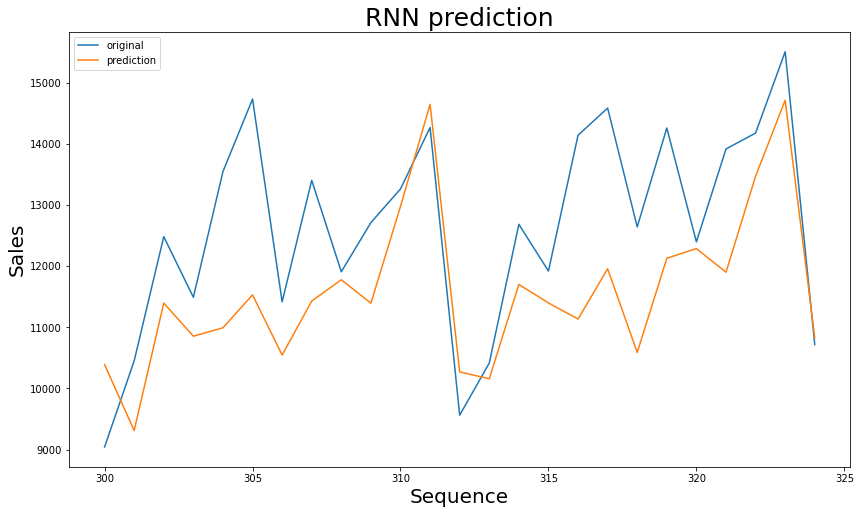

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 23ms/step - loss: 0.1248 - mae: 0.2826


[0.12476810812950134, 0.28260964155197144]